In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Visualization settings
plt.style.use('ggplot')
sns.set_palette("husl")

1. Load the Data

In [3]:
# Load the dataset
df=pd.read_csv('/content/carclaims.csv')

In [4]:
print(f"Dataset shape: {df.shape}")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset shape: (15420, 33)
Number of records: 15420
Number of features: 33


In [5]:
# Display first few roles
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [6]:
# Display last few roles
df.tail(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes


In [10]:
# Column names
print("All columns:")
print(df.columns.tolist())

All columns:
['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year', 'BasePolicy', 'FraudFound']


2. Data Overview

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [12]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()
print(f"Numerical columns ({len(numerical)}): {numerical}")
print(f"\nCategorical columns ({len(categorical)}): {categorical}")

Numerical columns (8): ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']

Categorical columns (25): ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'BasePolicy', 'FraudFound']


In [13]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


3. Target Variable Analysis - FraudFound

In [14]:
target_col = 'FraudFound'

print(f"Target column: {target_col}")
print(f"\nValue counts:")
print(df[target_col].value_counts())
print(f"\nClass distribution (%):")
print(df[target_col].value_counts(normalize=True) * 100)

Target column: FraudFound

Value counts:
FraudFound
No     14497
Yes      923
Name: count, dtype: int64

Class distribution (%):
FraudFound
No     94.014267
Yes     5.985733
Name: proportion, dtype: float64


/tmp/ipython-input-22477317.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(value_counts.index, rotation=0)


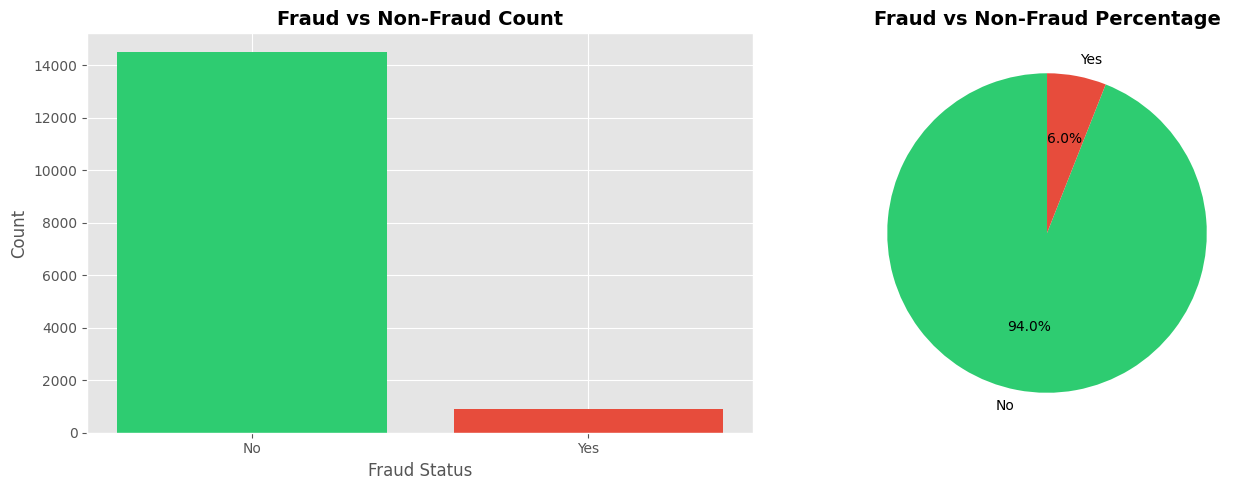

In [17]:
# Count plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

value_counts = df[target_col].value_counts()
axes[0].bar(value_counts.index, value_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Fraud vs Non-Fraud Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(value_counts.index, rotation=0)

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Fraud vs Non-Fraud Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [18]:
# Calculate fraud rate
fraud_counts = df[target_col].value_counts()
fraud_rate = (fraud_counts.iloc[1] / len(df)) * 100
print(f"\n⚠️ Fraud Rate: {fraud_rate:.2f}%")
if fraud_rate < 15:
    print("⚠️ This is an imbalanced dataset. We'll need to handle this in feature engineering.")


⚠️ Fraud Rate: 5.99%
⚠️ This is an imbalanced dataset. We'll need to handle this in feature engineering.


4. Missing Values Analysis

In [19]:
# Check missing values
missing = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

In [21]:
if len(missing) > 0:
    print("Missing values:")
    print(missing.to_string(index=False))
else:
    print("No missing values found")

No missing values found


In [22]:

# Check for '?' or other placeholder values in object columns
print("Checking for placeholder values ('?', 'None', etc.)")
placeholder_found = False
for col in df.select_dtypes(include=['object']).columns:
    placeholder_count = df[col].isin(['?', 'None', 'none', '', ' ']).sum()
    if placeholder_count > 0:
        print(f"{col}: {placeholder_count} placeholder values")
        placeholder_found = True

if not placeholder_found:
    print("✅ No placeholder values found!")

Checking for placeholder values ('?', 'None', etc.)
Days:Policy-Accident: 55 placeholder values
Days:Policy-Claim: 1 placeholder values
PastNumberOfClaims: 4352 placeholder values
NumberOfSuppliments: 7047 placeholder values


5. Numerical Features Analysis

In [24]:
print(f"Numerical features ({len(numerical)}):")
for col in numerical:
    print(f"{col}")

Numerical features (8):
WeekOfMonth
WeekOfMonthClaimed
Age
PolicyNumber
RepNumber
Deductible
DriverRating
Year


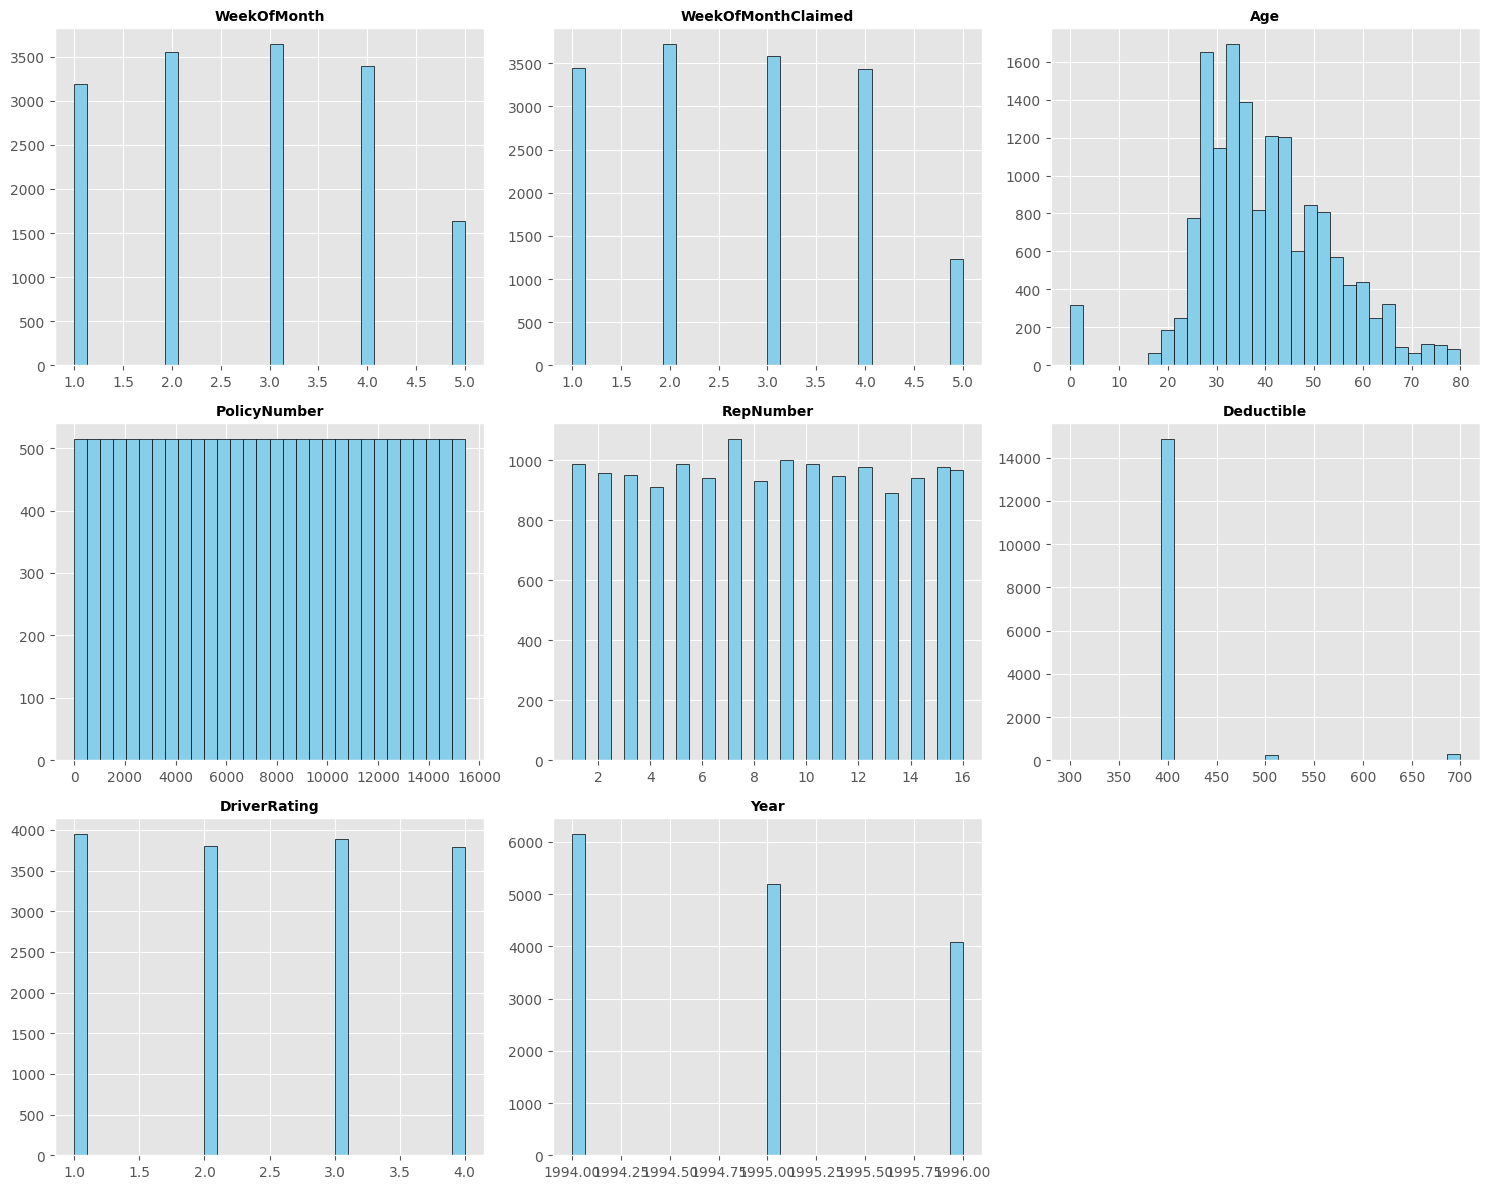

In [25]:
# Distribution of numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical):
    if idx < len(axes):
        df[col].hist(bins=30, ax=axes[idx], color='skyblue', edgecolor='black')
        axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('')

# Hide extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

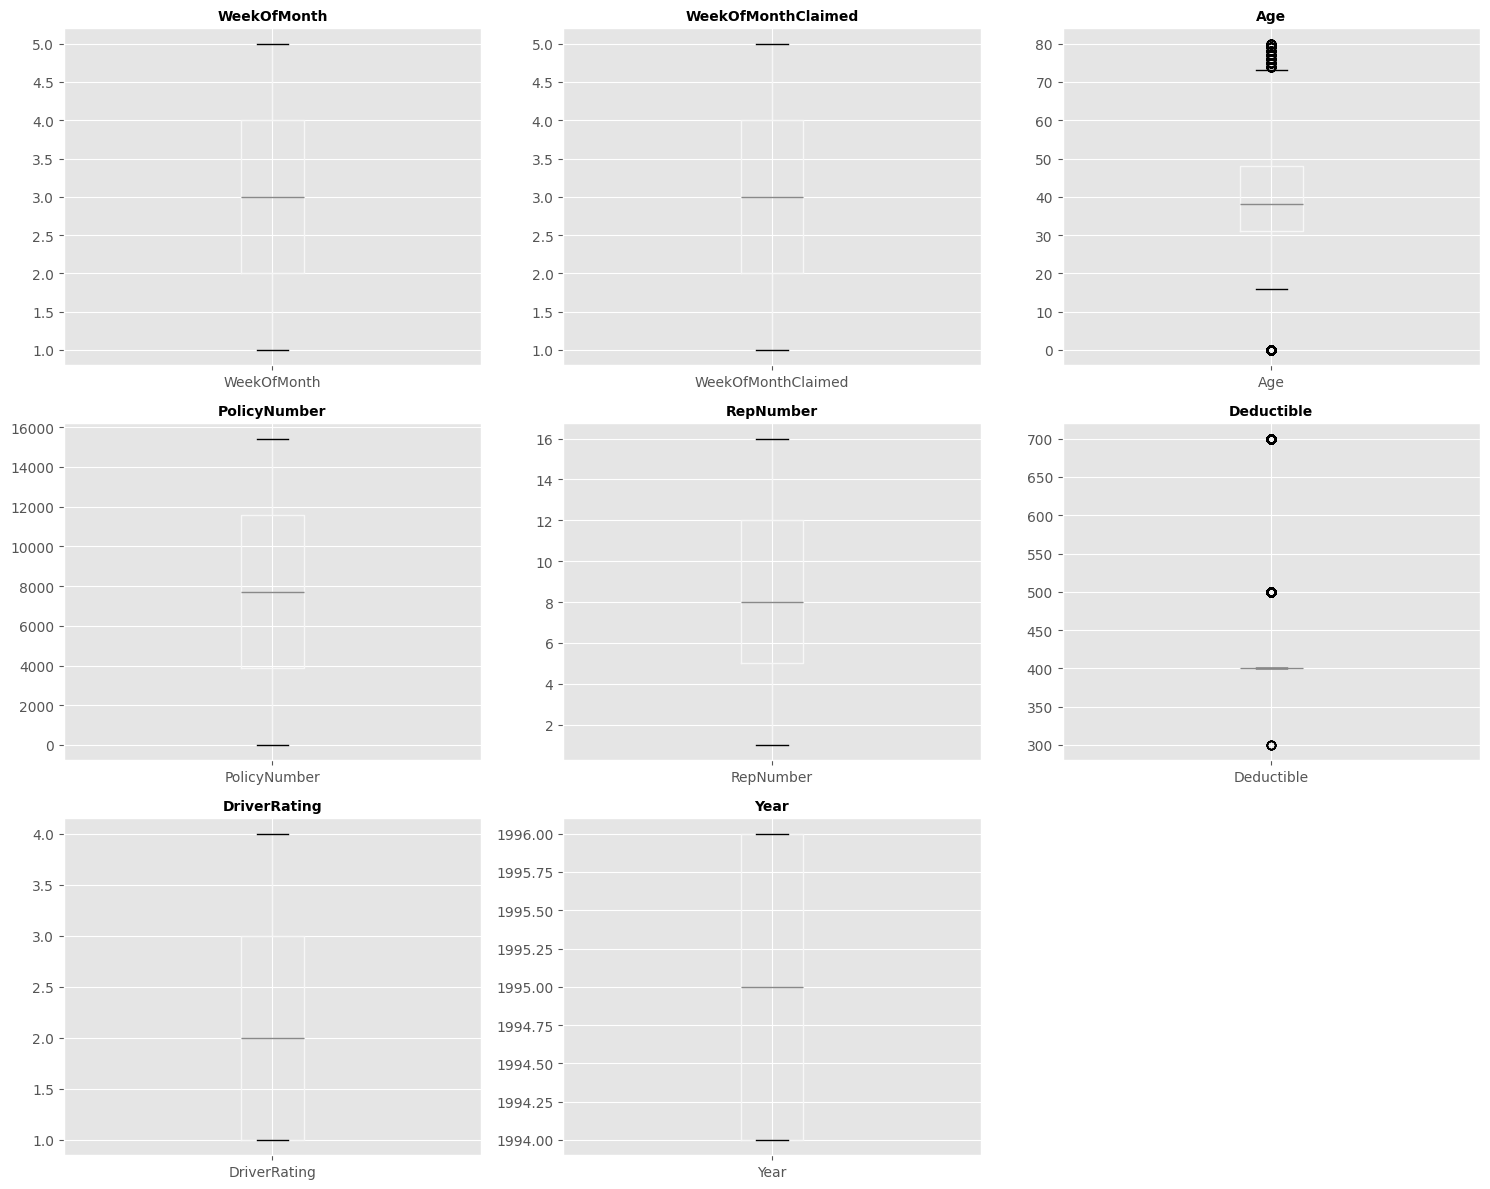

In [26]:
# Boxplots for numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical):
    if idx < len(axes):
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')

# Hide extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

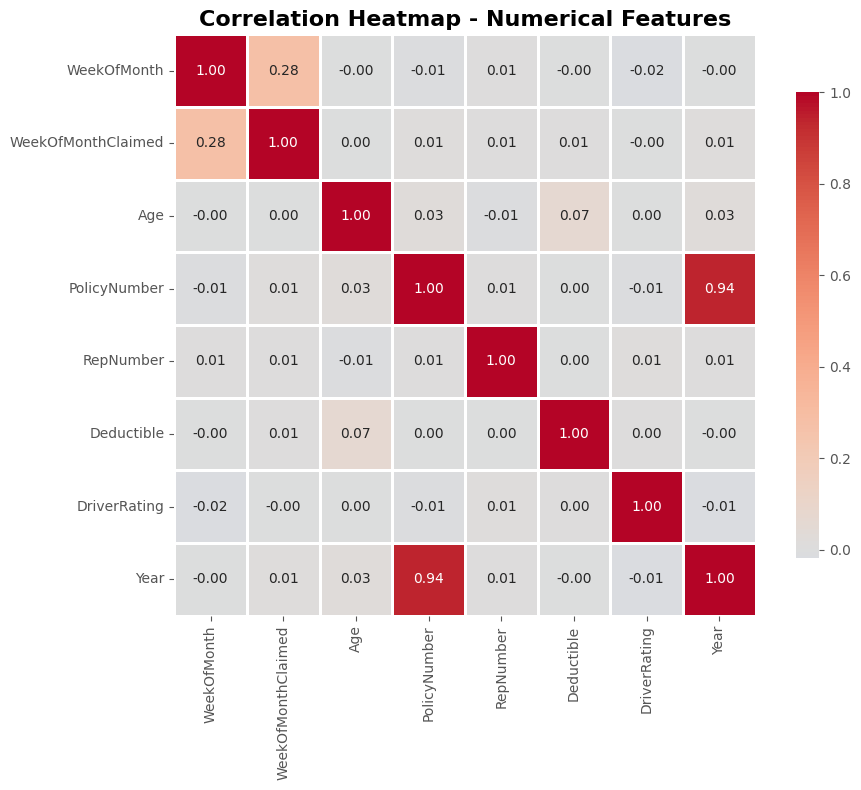

In [27]:
# %% Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df[numerical].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [28]:
# Print high correlations
print("High Correlations (> 0.7 or < -0.7)")
high_corr = []
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if abs(correlation.iloc[i, j]) > 0.7:
            high_corr.append((correlation.columns[i], correlation.columns[j], correlation.iloc[i, j]))

if high_corr:
    for col1, col2, corr_val in high_corr:
        print(f"{col1} <-> {col2}: {corr_val:.3f}")
else:
    print("No strong correlations found (threshold: 0.7)")

High Correlations (> 0.7 or < -0.7)
PolicyNumber <-> Year: 0.937


6. Categorical Features Analysis

In [29]:
print(f"Categorical features ({len(categorical)}):")
for col in categorical:
    unique_count = df[col].nunique()
    print(f"  - {col}: {unique_count} unique values")

Categorical features (25):
  - Month: 12 unique values
  - DayOfWeek: 7 unique values
  - Make: 19 unique values
  - AccidentArea: 2 unique values
  - DayOfWeekClaimed: 8 unique values
  - MonthClaimed: 13 unique values
  - Sex: 2 unique values
  - MaritalStatus: 4 unique values
  - Fault: 2 unique values
  - PolicyType: 9 unique values
  - VehicleCategory: 3 unique values
  - VehiclePrice: 6 unique values
  - Days:Policy-Accident: 5 unique values
  - Days:Policy-Claim: 4 unique values
  - PastNumberOfClaims: 4 unique values
  - AgeOfVehicle: 8 unique values
  - AgeOfPolicyHolder: 9 unique values
  - PoliceReportFiled: 2 unique values
  - WitnessPresent: 2 unique values
  - AgentType: 2 unique values
  - NumberOfSuppliments: 4 unique values
  - AddressChange-Claim: 5 unique values
  - NumberOfCars: 5 unique values
  - BasePolicy: 3 unique values
  - FraudFound: 2 unique values


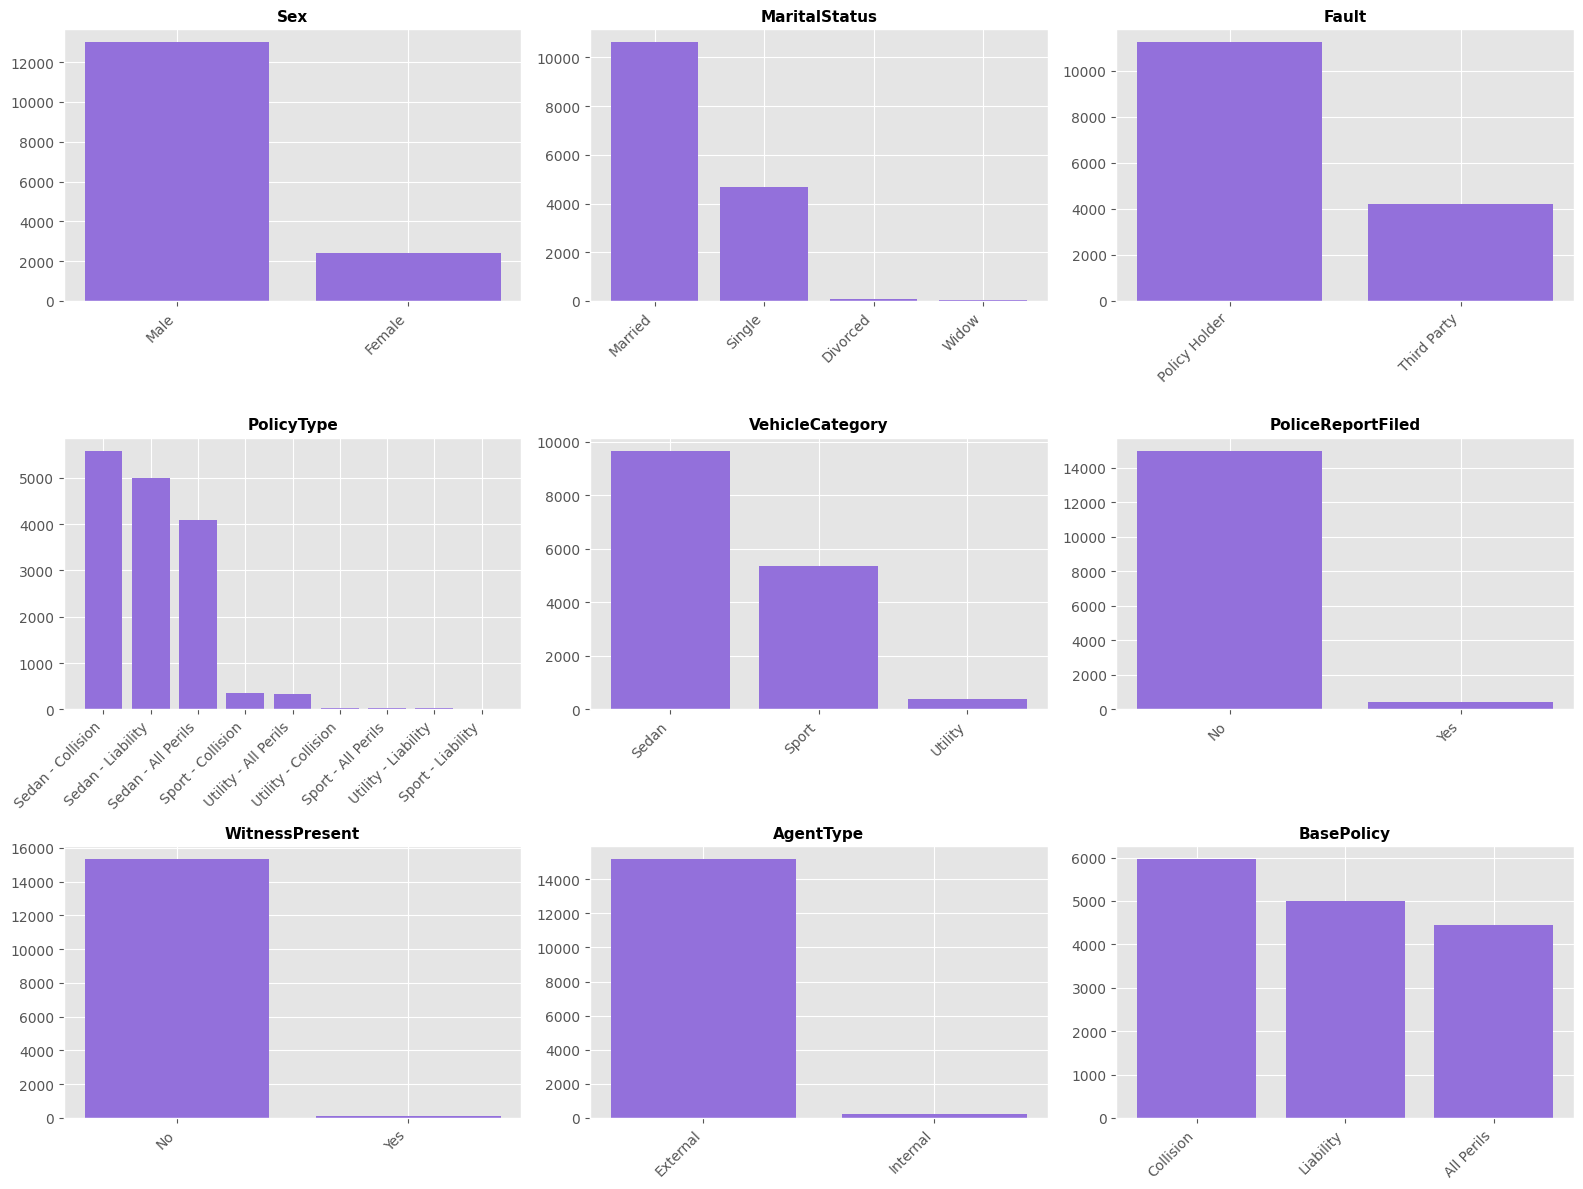

In [30]:
# Analyze key categorical features
key_categorical = ['Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
                   'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'BasePolicy']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(key_categorical):
    if idx < len(axes):
        value_counts = df[col].value_counts().head(10)
        axes[idx].bar(range(len(value_counts)), value_counts.values, color='mediumpurple')
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('')

plt.tight_layout()
plt.show()

7. Feature vs Target Analysis

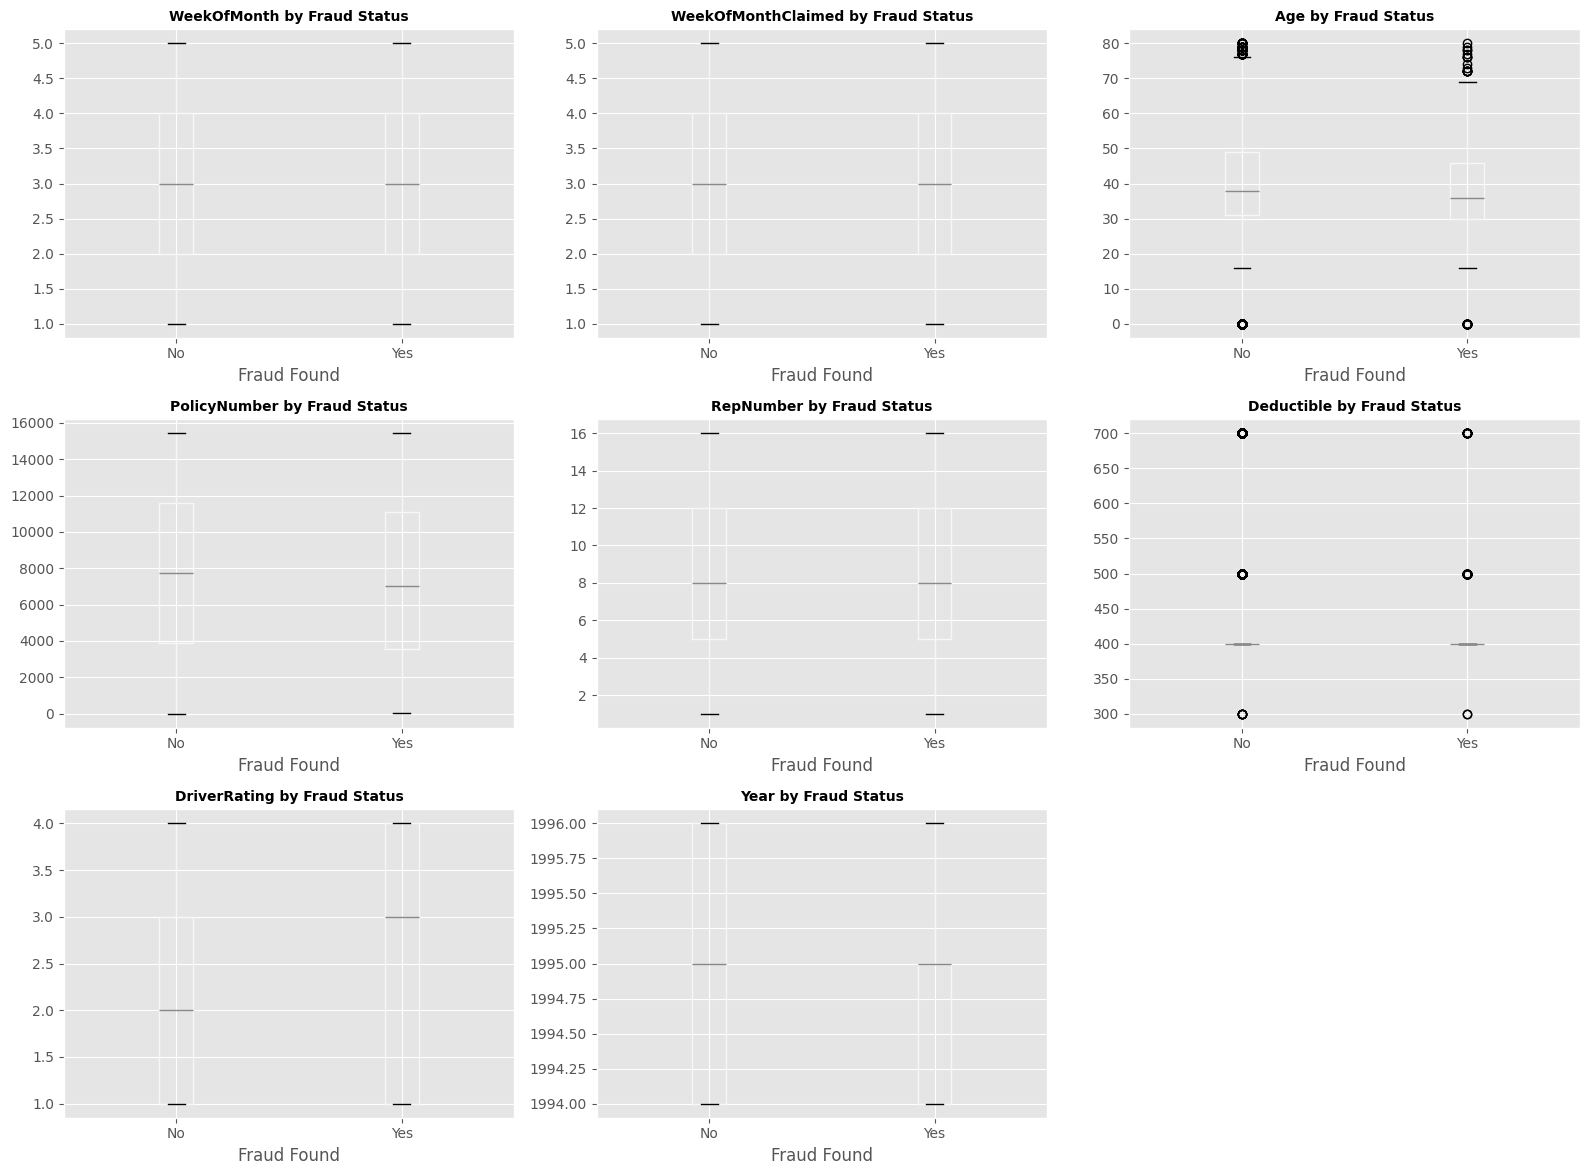

In [32]:
# 7. Feature vs Target Analysis

# %% Numerical features vs FraudFound
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical):
    if idx < len(axes):
        df.boxplot(column=col, by='FraudFound', ax=axes[idx])
        axes[idx].set_title(f'{col} by Fraud Status', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Fraud Found')

# Hide extra subplot
axes[-1].axis('off')

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

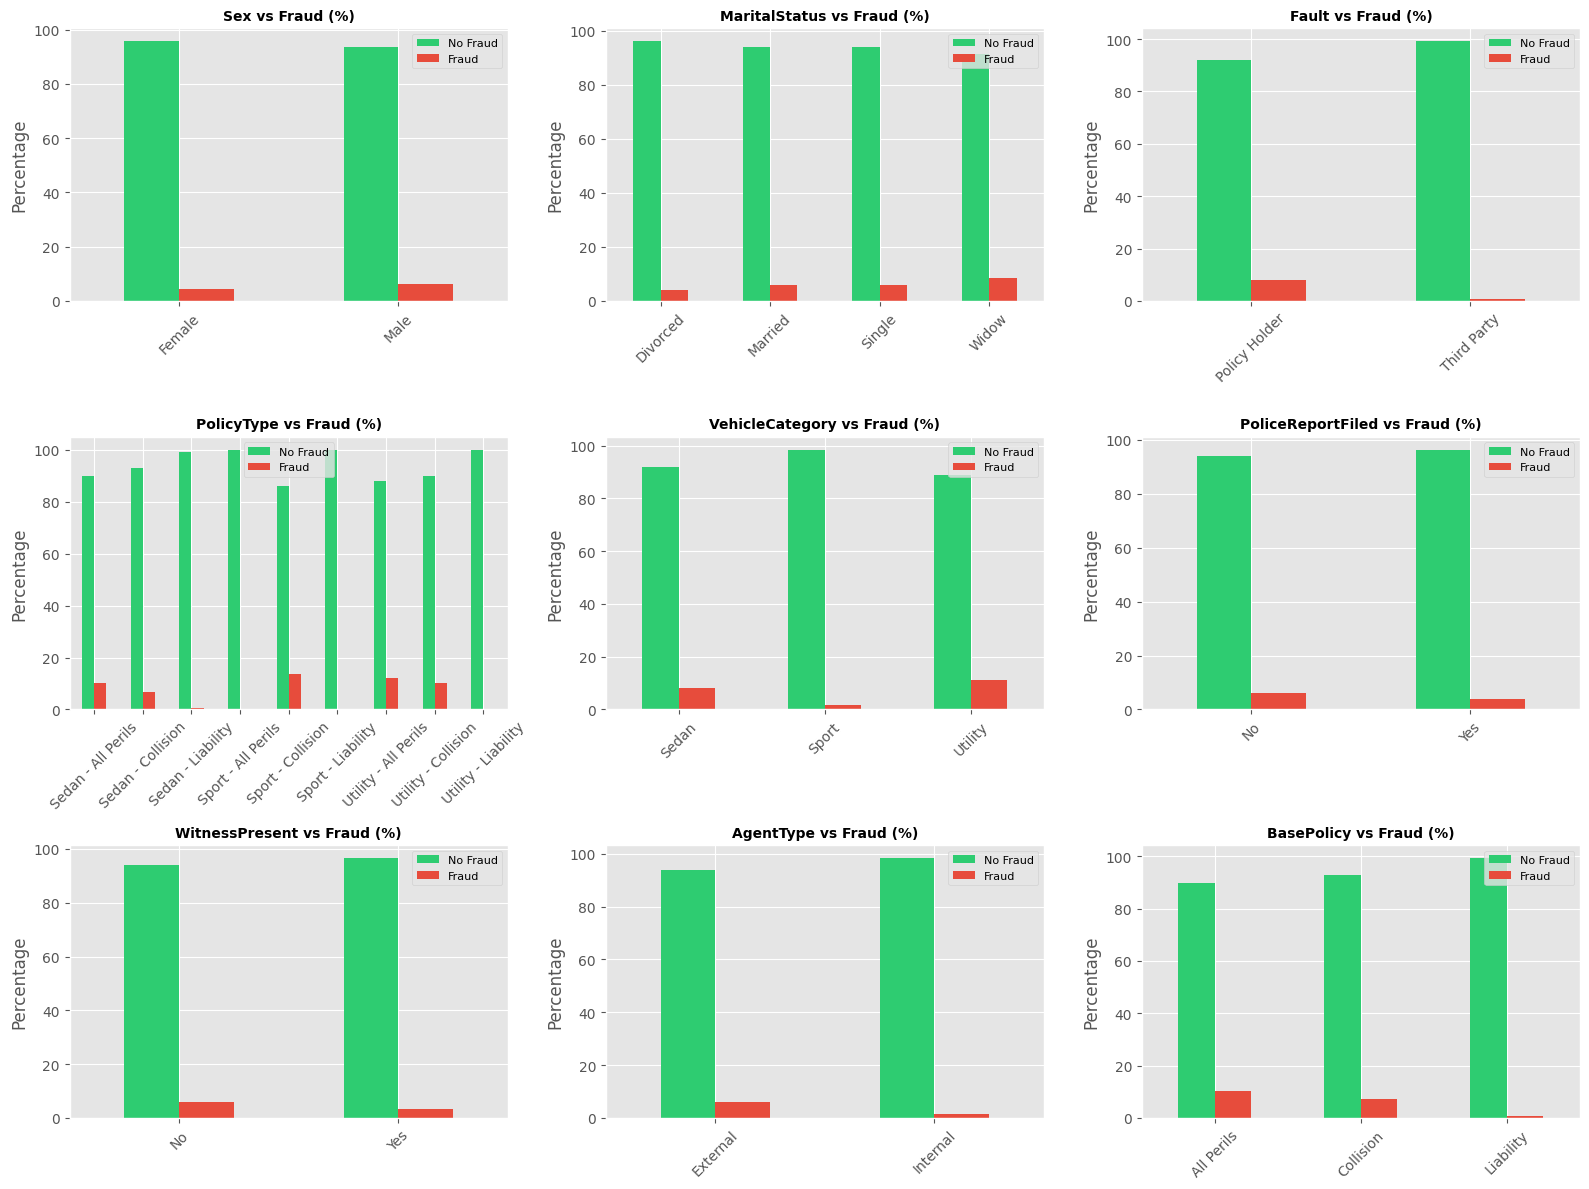

In [33]:
# Categorical features vs FraudFound
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(key_categorical):
    if idx < len(axes):
        ct = pd.crosstab(df[col], df['FraudFound'], normalize='index') * 100
        ct.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
        axes[idx].set_title(f'{col} vs Fraud (%)', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('')
        axes[idx].set_ylabel('Percentage')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].legend(['No Fraud', 'Fraud'], fontsize=8)

plt.tight_layout()
plt.show()

In [35]:
# Calculate fraud rate by categorical feature
print("FRAUD RATE BY CATEGORICAL FEATURE")

for col in ['PoliceReportFiled', 'WitnessPresent', 'Fault', 'AccidentArea']:
    print(f"\n{col}:")
    fraud_by_cat = df.groupby(col)['FraudFound'].apply(
        lambda x: (x == x.unique()[1] if len(x.unique()) > 1 else x == x.unique()[0]).sum() / len(x) * 100
    ).sort_values(ascending=False)
    print(fraud_by_cat)


FRAUD RATE BY CATEGORICAL FEATURE

PoliceReportFiled:
PoliceReportFiled
No     6.049893
Yes    3.738318
Name: FraudFound, dtype: float64

WitnessPresent:
WitnessPresent
No     6.000130
Yes    3.448276
Name: FraudFound, dtype: float64

Fault:
Fault
Policy Holder    7.889581
Third Party      0.883055
Name: FraudFound, dtype: float64

AccidentArea:
AccidentArea
Rural    8.322904
Urban    5.715526
Name: FraudFound, dtype: float64


8. Specific Features Analysis

ANALYZING POLICY DAYS FEATURES

Days:Policy-Accident unique values:
Days:Policy-Accident
more than 30    15247
none               55
8 to 15            55
15 to 30           49
1 to 7             14
Name: count, dtype: int64

Days:Policy-Claim unique values:
Days:Policy-Claim
more than 30    15342
15 to 30           56
8 to 15            21
none                1
Name: count, dtype: int64


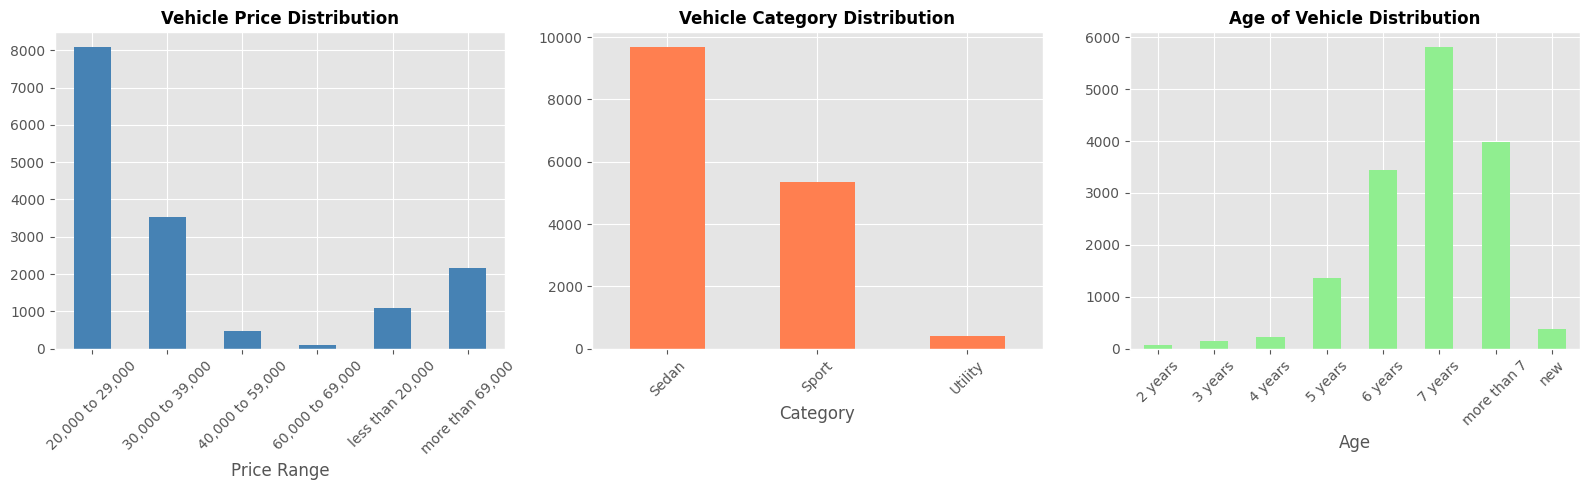

In [36]:
#Analyze Days:Policy-Accident and Days:Policy-Claim
print("ANALYZING POLICY DAYS FEATURES")
print("\nDays:Policy-Accident unique values:")
print(df['Days:Policy-Accident'].value_counts().head(10))
print("\nDays:Policy-Claim unique values:")
print(df['Days:Policy-Claim'].value_counts().head(10))

# %% Analyze vehicle-related features
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# VehiclePrice
df['VehiclePrice'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Vehicle Price Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Price Range')
axes[0].tick_params(axis='x', rotation=45)

# VehicleCategory
df['VehicleCategory'].value_counts().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Vehicle Category Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Category')
axes[1].tick_params(axis='x', rotation=45)

# AgeOfVehicle
df['AgeOfVehicle'].value_counts().sort_index().plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Age of Vehicle Distribution', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Age')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

9. Outlier Detection

In [39]:
# Detect outliers using IQR method
def detect_outliers_iqr(df, columns):
    outlier_summary = []

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_pct = (outlier_count / len(df)) * 100

        outlier_summary.append({
            'Feature': col,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': f"{outlier_pct:.2f}%"
        })

    return pd.DataFrame(outlier_summary)

outlier_df = detect_outliers_iqr(df, numerical)


print("OUTLIER DETECTION (IQR METHOD)")
print(outlier_df.to_string(index=False))

OUTLIER DETECTION (IQR METHOD)
           Feature      Q1       Q3    IQR  Lower_Bound  Upper_Bound  Outlier_Count Outlier_Percentage
       WeekOfMonth    2.00     4.00    2.0         -1.0          7.0              0              0.00%
WeekOfMonthClaimed    2.00     4.00    2.0         -1.0          7.0              0              0.00%
               Age   31.00    48.00   17.0          5.5         73.5            547              3.55%
      PolicyNumber 3855.75 11565.25 7709.5      -7708.5      23129.5              0              0.00%
         RepNumber    5.00    12.00    7.0         -5.5         22.5              0              0.00%
        Deductible  400.00   400.00    0.0        400.0        400.0            582              3.77%
      DriverRating    1.00     3.00    2.0         -2.0          6.0              0              0.00%
              Year 1994.00  1996.00    2.0       1991.0       1999.0              0              0.00%


In [41]:
# Key features
print("POTENTIALLY IMPORTANT FEATURES:")
print("PoliceReportFiled: Important indicator")
print("WitnessPresent: May correlate with fraud")
print("Fault: Claims where policy holder at fault")
print("AccidentArea: Urban vs Rural patterns")
print("AgeOfVehicle, VehiclePrice: Vehicle characteristics")
print("PastNumberOfClaims: Historical behavior")

POTENTIALLY IMPORTANT FEATURES:
PoliceReportFiled: Important indicator
WitnessPresent: May correlate with fraud
Fault: Claims where policy holder at fault
AccidentArea: Urban vs Rural patterns
AgeOfVehicle, VehiclePrice: Vehicle characteristics
PastNumberOfClaims: Historical behavior
